In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from mlxtend.plotting import plot_decision_regions # 데이터 사이언스 작업라이브러리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
df = pd.read_csv('./knn_data/basketball.csv')
print("데이터 : ", df. sample(5))


print(df["Position"].unique()) #분리
df = df.drop(["Player"], axis = 1)
df["Position"] = df["Position"].map({'SG':0, 'C':1})
print("\n\n전처리 2차 : 이름제거, 문자열 -> 숫자변화 \n",df.sample(5))

X_data = df[["3Point",  "2Point",  "Assist",  "Steel",  "Blocking"]]
Y_data = df["Position"]

print("\n\n 전처리 3차\n ", X_data.sample(5),"\n", Y_data.sample(5))

# 트레인 테스트 8:2 비율로 분할
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.2)

# StandrdScaler - 기본 스케일, 평균과 표준편차 사용
# MinMaxScaler - 최대/ 최소 각각 1,0 이되도록
# MaxAbsScaler - 최대 절대값과 0이 각각 1,0이 되도록
# RobustScaler - 중앙값과 IQR사용

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

데이터 :                Player Position  3Point  2Point  Assist  Steel  Blocking
7    Marco Belinelli       SG     1.4     2.2     2.0    0.6       0.1
76       J.J. Redick       SG     2.6     2.5     1.4    0.7       0.2
8   Patrick Beverley       SG     1.6     1.8     4.2    1.5       0.4
77       Willie Reed        C     0.0     2.3     0.4    0.3       0.7
45       Buddy Hield       SG     1.8     2.2     1.5    0.5       0.1
['SG' 'C']


전처리 2차 : 이름제거, 문자열 -> 숫자변화 
     Position  3Point  2Point  Assist  Steel  Blocking
79         0     1.5     2.9     2.8    0.6       0.1
1          1     0.0     4.7     1.1    1.1       1.0
71         1     0.0     3.1     0.8    0.3       0.6
88         0     1.3     1.6     2.6    1.3       0.4
59         0     1.4     2.8     2.3    1.1       0.3


 전처리 3차
      3Point  2Point  Assist  Steel  Blocking
24     0.0     2.1     0.6    0.5       0.8
61     1.8     5.6     2.3    0.5       1.7
97     1.8     4.3     4.3    0.9       0.4
21     1.9   

80
[1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 1]
[1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 

Text(0, 0.5, 'Mean Error')

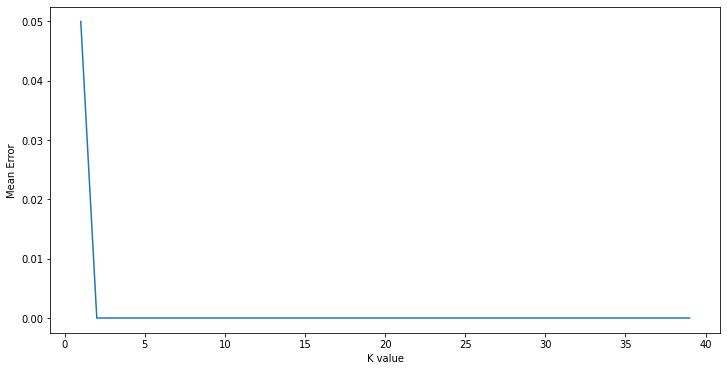

In [90]:
error = []

print(len(X_train))

# i 가 1 일때 하나 틀림
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    print(pred_i)
    error.append(np.mean(pred_i != Y_test))
    
print(error)
# print(Y_test)
# print(pred_i)

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error)
plt.xlabel("K value")
plt.ylabel("Mean Error")

100.0 % 


<Figure size 432x288 with 0 Axes>

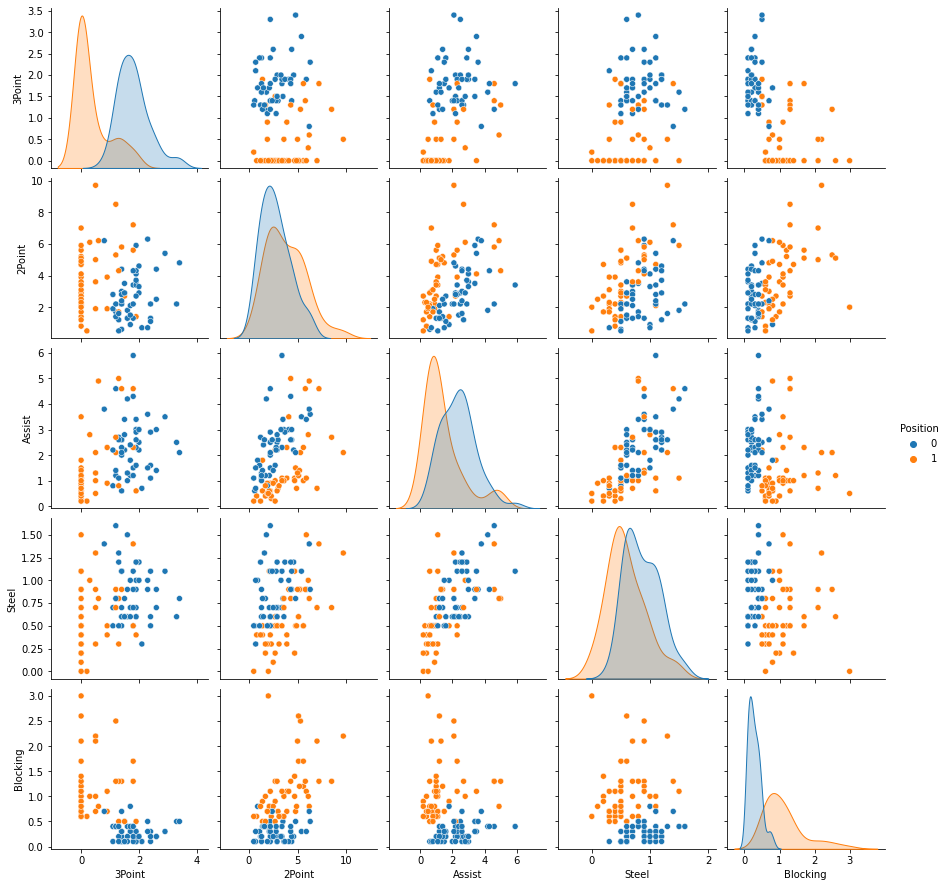

In [114]:
# k값 2부터 100% 다 맞음
classifier = KNeighborsClassifier(n_neighbors=2)
classifier.fit(X_train,Y_train)

Y_pred = classifier.predict(X_test)

accuracy = accuracy_score(Y_test,Y_pred) * 100
print(str(round(accuracy,2)) + ' % ')

plt.figure()
# print(df.sample(10))

sns.pairplot(df, hue = "Position")